In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"]=[15,8]

import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
com=pd.concat([train,test],ignore_index=True)
com.shape

(783667, 12)

In [5]:
com.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [6]:
# describe to see the pattern in the data
com.describe(include="all").T

# popular product id is P00265242
# frequency of buying is more among males
# most buying is coming from 26_35 bracket
#most of the buyers are coming from city category b
# on an avg people stay for one year in the current city
# purchase min is 12 and max is 23961 dollars

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667.0,NaN,NaN,NaN,1003028.995753,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667.0,NaN,NaN,NaN,8.0793,6.522206,0.0,2.0,7.0,14.0,20.0
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667.0,NaN,NaN,NaN,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,NaN,NaN,NaN,5.366196,3.87816,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,NaN,NaN,NaN,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0


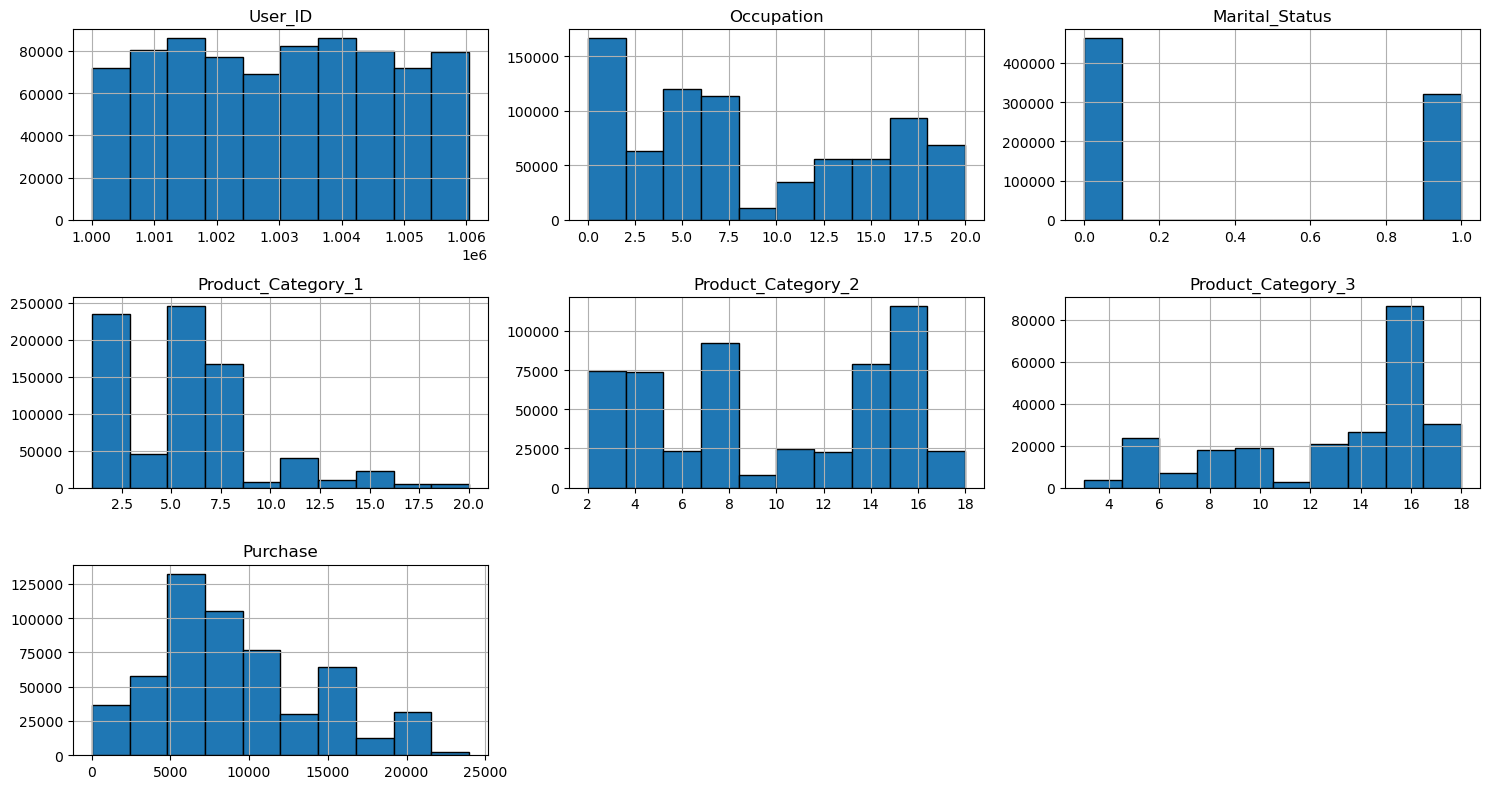

In [7]:
com.hist(edgecolor="black")
plt.tight_layout()
plt.show()

In [8]:
# catgorical var
com.select_dtypes(include="object").columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742'], dtype='object')


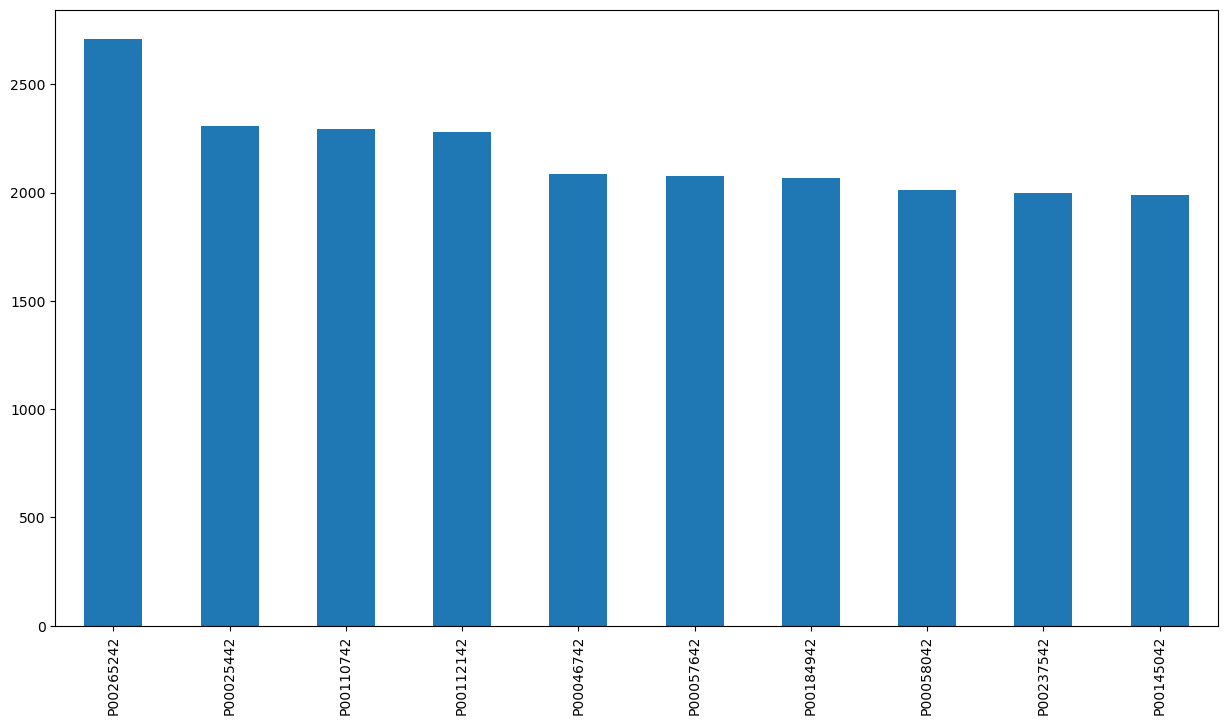

In [9]:
print(com.Product_ID.value_counts()[0:5].index)
com.Product_ID.value_counts()[:10].plot(kind='bar')
plt.show()

In [10]:
products=['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742']

def prod_cat(x):
    if x in products:
        return("top5")
    else:
        return("others")
    
com["product_cat"]=com.Product_ID.apply(prod_cat)

In [11]:
com.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_cat
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,others
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,others


In [12]:
com.product_cat.value_counts()

others    771993
top5       11674
Name: product_cat, dtype: int64

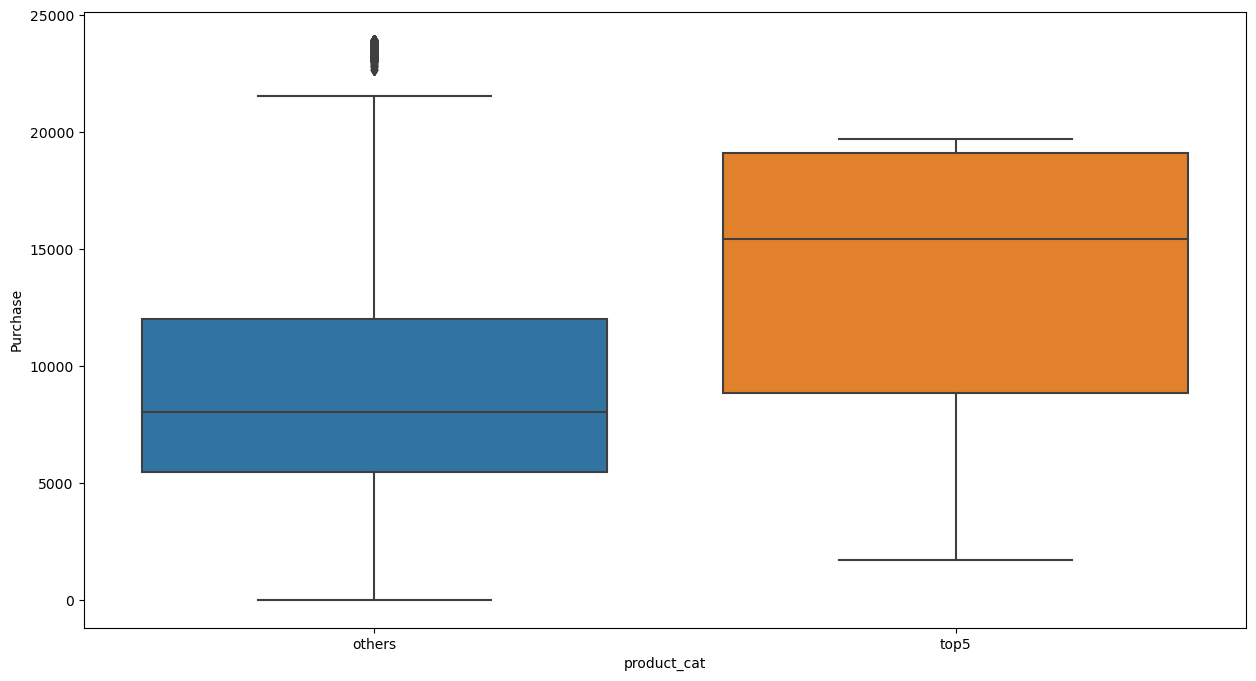

In [13]:
sns.boxplot(com.product_cat,com.Purchase)
plt.show()

<AxesSubplot:>

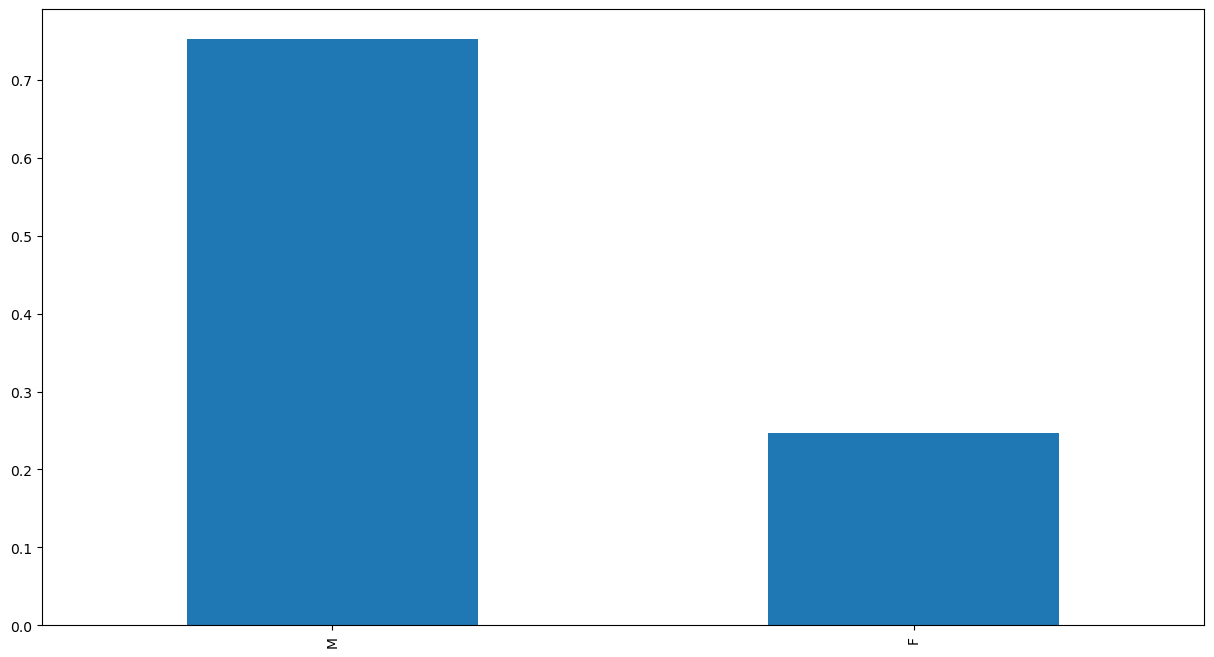

In [14]:
# gender and age
com.Gender.value_counts(normalize=True).plot(kind="bar")

<AxesSubplot:xlabel='Age', ylabel='count'>

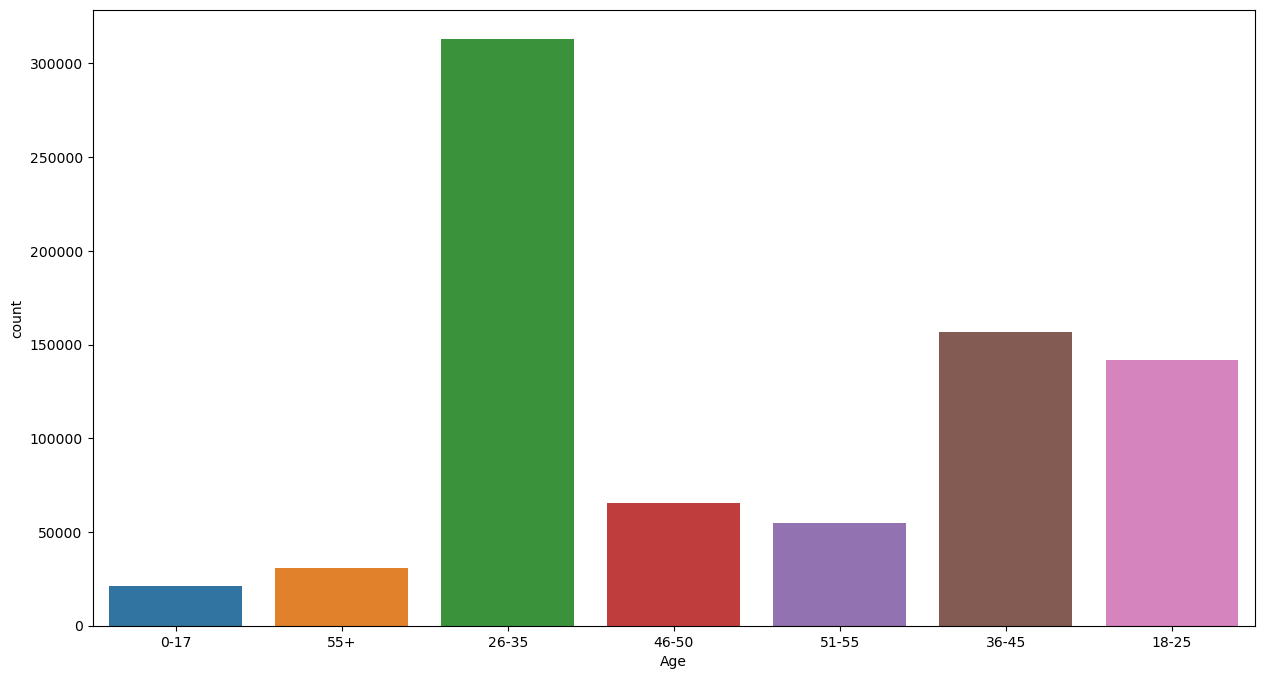

In [15]:
#com.Age.value_counts(normalize=True)
sns.countplot(com.Age)

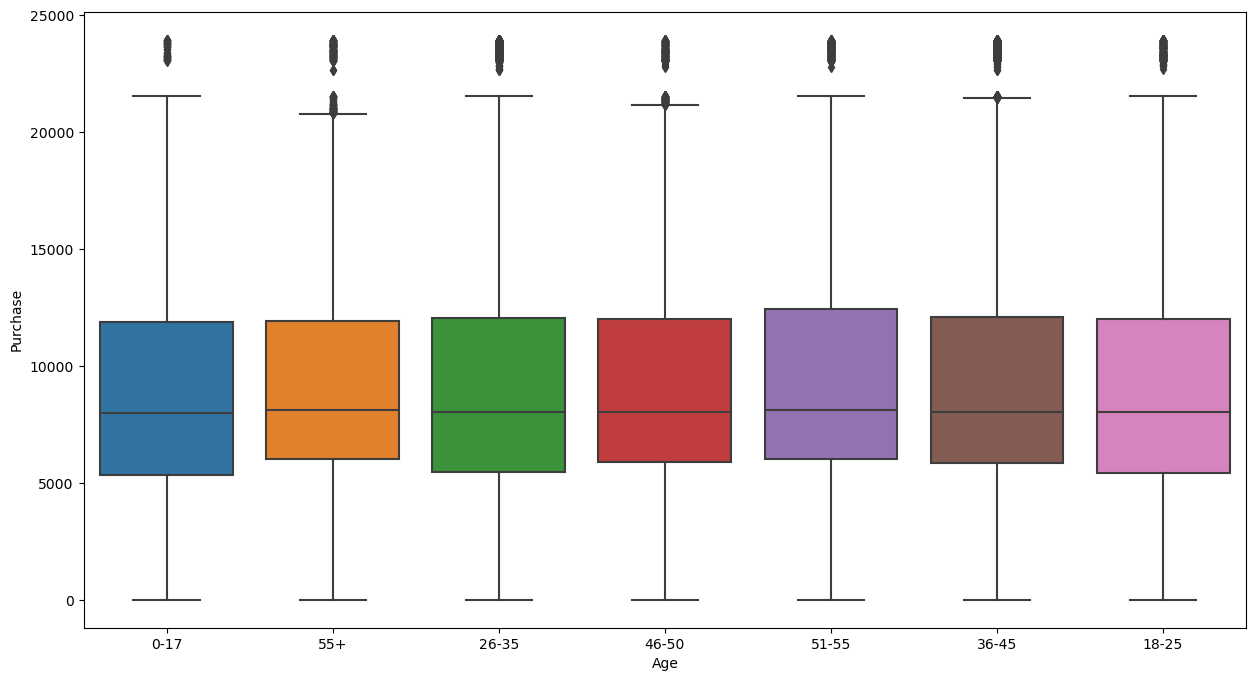

In [16]:
sns.boxplot(com.Age,com.Purchase)
plt.show()

In [17]:
# age into numbers
com[["Age1","Age2"]]=com.Age.str.split("-",expand=True)

In [18]:
com["Age1"]=com.Age1.str.strip("+").astype("float")

In [19]:
com.Age2.unique()

array(['17', None, '35', '50', '55', '45', '25'], dtype=object)

In [20]:
com.loc[com.Age2.isnull(),"Age2"]=55

In [21]:
com.loc[com.Age1==0,"Age1"]=17

In [22]:
#avg age
com["Avg_Age"]=com.loc[:,["Age1","Age2"]].mean(axis=1)

In [23]:
com.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_cat,Age1,Age2,Avg_Age
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,others,17.0,17,17.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,others,17.0,17,17.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,others,17.0,17,17.0


In [24]:
com.Avg_Age.unique()

array([17., 55., 26., 46., 51., 36., 18.])

In [25]:
com.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

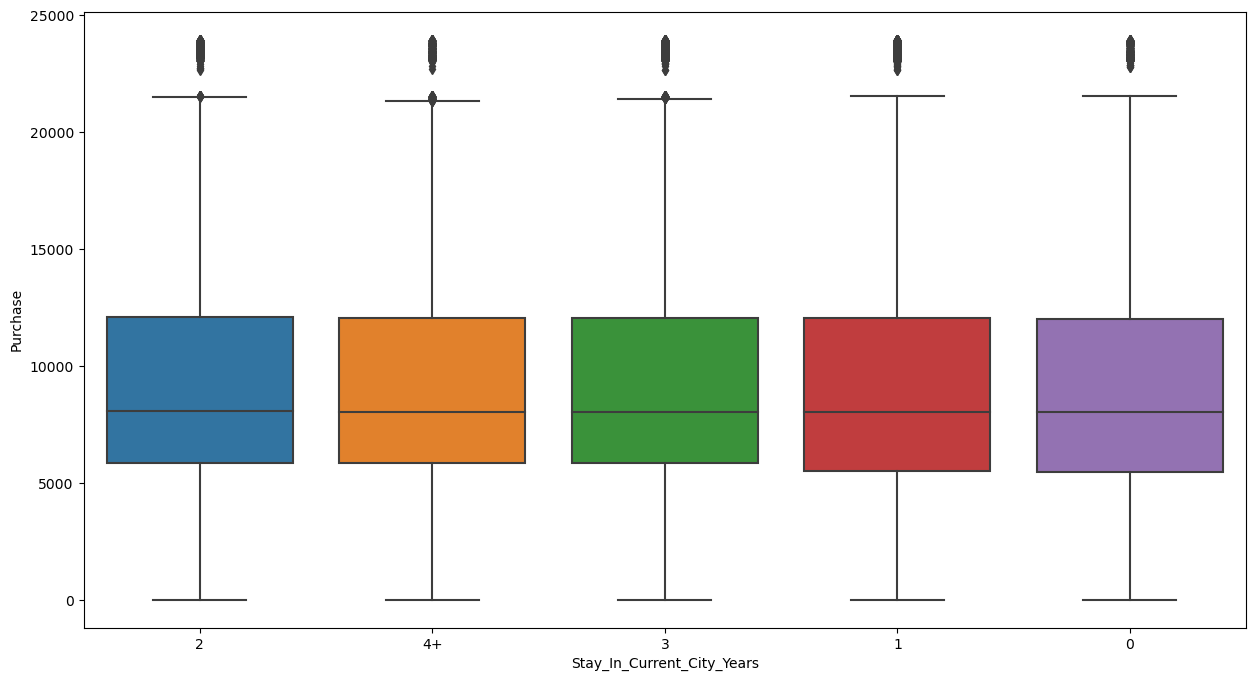

In [26]:
sns.boxplot(com.Stay_In_Current_City_Years,com.Purchase)

In [27]:
com["Stay_In_Current_City_Years"]=com["Stay_In_Current_City_Years"].str.strip("+").astype("int")

In [28]:
com.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [29]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000


In [30]:
com.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [31]:
def product_cat(x):
    if x in [5,8,1]:
        return("Top3")
    else:
        return("Others")

In [32]:
com["Prod1"]=com.Product_Category_1.apply(product_cat)

In [33]:
from sklearn.preprocessing import KBinsDiscretizer




In [34]:
kbins = KBinsDiscretizer(encode = "onehot", strategy = "uniform",n_bins=5)

com["Prod2b"]=kbins.fit_transform(pd.DataFrame(com.loc[:,"Product_Category_1"]))
com.Prod2b.value_counts()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

<AxesSubplot:xlabel='Prod1b', ylabel='Purchase'>

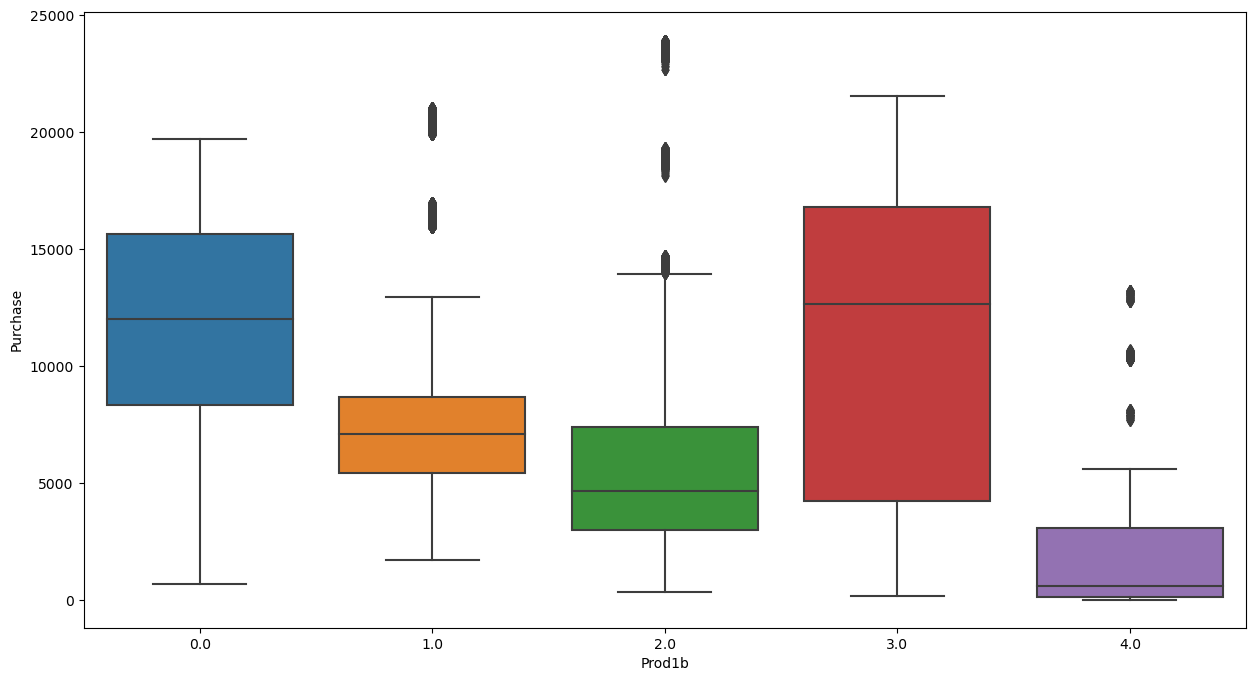

In [62]:
sns.boxplot(com.Prod1b,com.Purchase)

In [35]:
# how to find the pattern when there is no pattern 

com["Mean_Tgt_City_Wise"]=com.groupby("City_Category")["Purchase"].transform("mean")
com["Median_Tgt_City_Wise"]=com.groupby("City_Category")["Purchase"].transform("median")
com["std_Tgt_City_Wise"]=com.groupby("City_Category")["Purchase"].transform("std")

In [36]:
com["Prod_Wise_User_Count"]=com.groupby("Product_ID")["User_ID"].transform("nunique")

In [37]:
com.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Purchase,product_cat,Age1,Age2,Avg_Age,Prod1,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise,Prod_Wise_User_Count
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,8370.0,others,17.0,17,17.0,Others,8911.939216,7931.0,4892.115238,344
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,15200.0,others,17.0,17,17.0,Top3,8911.939216,7931.0,4892.115238,845


In [38]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise,Prod_Wise_User_Count
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485


In [39]:
# product and product cat 1 user count
com["Prod_Cat1_User_count"]=com.groupby(["Product_Category_1"])["User_ID"].transform("nunique")

In [40]:
# purchase stats basis product id
com["Mean_Tgt_Prod_ID"]=com.groupby("Product_ID")["Purchase"].transform("mean")
com["Median_Tgt_Prod_ID"]=com.groupby("Product_ID")["Purchase"].transform("median")
com["Min_Tgt_Prod_ID"]=com.groupby("Product_ID")["Purchase"].transform("min")
com["Max_Tgt_Prod_ID"]=com.groupby("Product_ID")["Purchase"].transform("max")
com["Std_Tgt_Prod_ID"]=com.groupby("Product_ID")["Purchase"].transform("std")

In [41]:
com.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,8911.939216,7931.0,4892.115238,344,4195,11870.863436,13265.0,2648.0,13716.0,2205.413246
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,8911.939216,7931.0,4892.115238,845,5836,16304.030981,15812.0,3880.0,19701.0,3340.288874


In [42]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410


In [43]:
com["Magic1"]=com.groupby("User_ID")["Purchase"].transform("mean")
com["Magic2"]=com.groupby("User_ID")["Purchase"].transform("median")
com["Magic3"]=com.groupby("User_ID")["Purchase"].transform("min")
com["Magic4"]=com.groupby("User_ID")["Purchase"].transform("max")
com["Magic5"]=com.groupby("User_ID")["Purchase"].transform("std")

In [44]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,...,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Magic1,Magic2,Magic3,Magic4,Magic5
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,...,0.006088,0.005956,0.002325,0.000092,-0.006442,0.014107,0.020833,-0.011002,0.018201,0.035780
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,...,0.019854,0.019313,0.017985,0.019116,0.016758,0.064003,0.053898,-0.012964,0.019097,0.051473
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,...,0.001146,0.001166,0.001352,0.003594,0.004391,0.017561,0.016503,0.018911,-0.013980,0.008029
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,...,0.003334,0.002429,0.004886,-0.007862,-0.016393,-0.000847,0.011550,0.015130,0.030536,-0.019182
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,...,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197,-0.113473,-0.129816,-0.034221,0.043594,-0.015519
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,...,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987,-0.041100,-0.052731,-0.017086,0.038608,-0.002983
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,...,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252,0.033844,0.025033,-0.012696,0.039088,0.035248
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,...,0.849659,0.839742,0.735215,0.797802,0.699741,0.322415,0.296645,0.057013,0.059118,0.179935
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,...,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,...,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581


In [45]:
com["Prod_Age_Bins"]=com.groupby("Product_ID")["Age"].transform("nunique")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

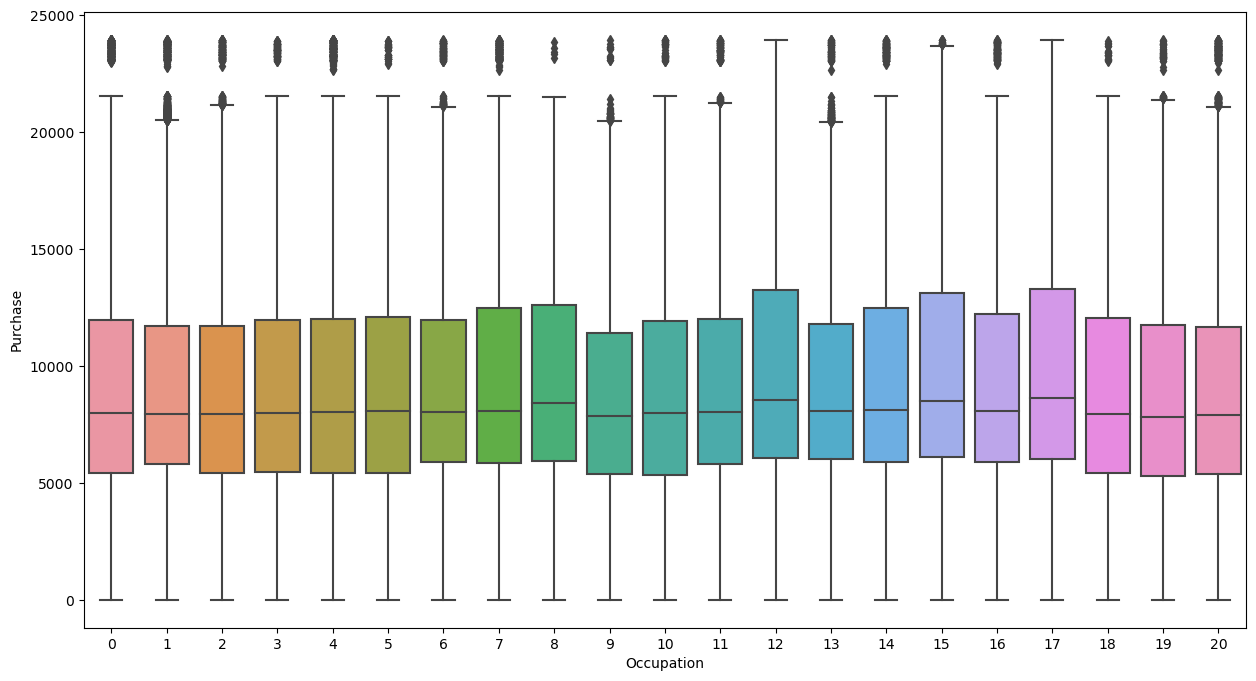

In [46]:
# occupation
sns.boxplot(com.Occupation,com.Purchase)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

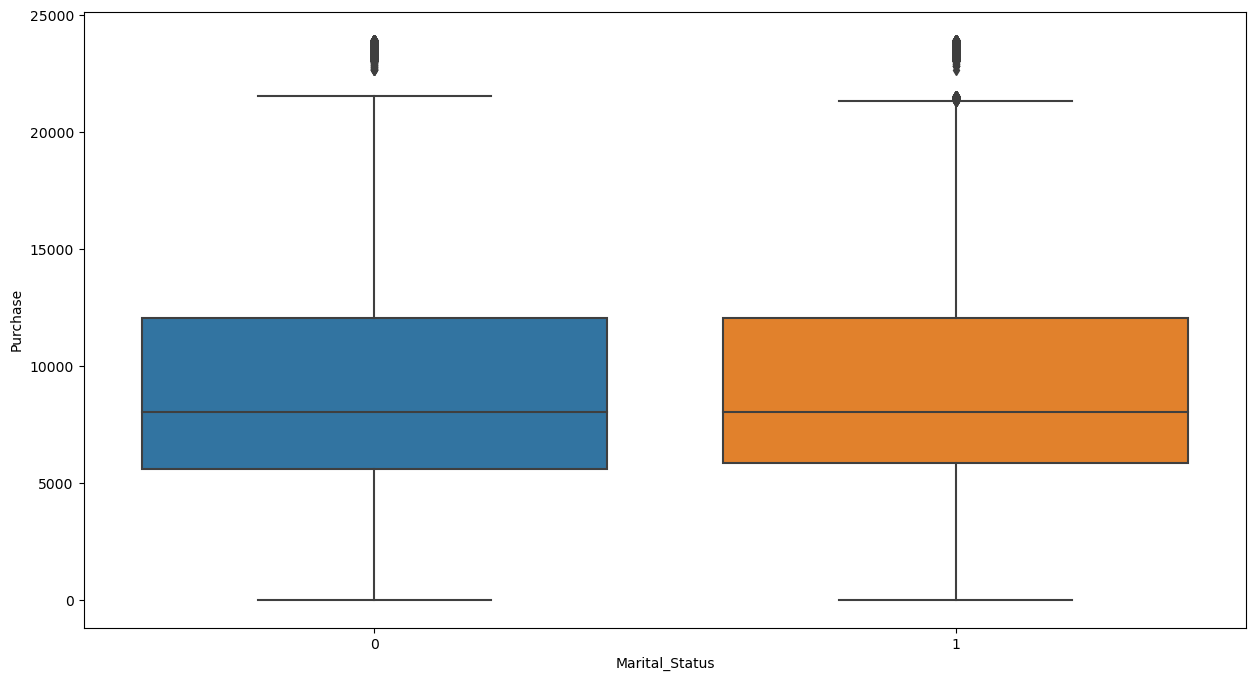

In [47]:
# marital status
# occupation
sns.boxplot(com.Marital_Status,com.Purchase)

In [48]:
# drop the variables 
new=com.drop(["User_ID","Product_ID","Age1","Age2","Product_Category_2","Product_Category_3"],axis=1)

In [49]:
new.shape

(783667, 27)

In [50]:
new.isnull().sum()[new.isnull().sum()!=0]

Purchase              233599
Mean_Tgt_Prod_ID          61
Median_Tgt_Prod_ID        61
Min_Tgt_Prod_ID           61
Max_Tgt_Prod_ID           61
Std_Tgt_Prod_ID          272
dtype: int64

In [51]:
# imputing the null values
val=new.Min_Tgt_Prod_ID.median()
new.loc[new.Min_Tgt_Prod_ID.isnull(),"Min_Tgt_Prod_ID"]=val

In [52]:
val1=new.Mean_Tgt_Prod_ID.median()
new.loc[new.Mean_Tgt_Prod_ID.isnull(),"Mean_Tgt_Prod_ID"]=val1

val2=new.Median_Tgt_Prod_ID.median()
new.loc[new.Median_Tgt_Prod_ID.isnull(),"Median_Tgt_Prod_ID"]=val2

val3=new.Max_Tgt_Prod_ID.median()
new.loc[new.Max_Tgt_Prod_ID.isnull(),"Max_Tgt_Prod_ID"]=val3

In [53]:
com.Std_Tgt_Prod_ID.describe()

count    783395.000000
mean       2439.156018
std        1063.878769
min          11.313708
25%        1642.662313
50%        1980.041543
75%        3470.043730
max        8970.356626
Name: Std_Tgt_Prod_ID, dtype: float64

In [54]:
val4=new.Std_Tgt_Prod_ID.median()
new.loc[new.Std_Tgt_Prod_ID.isnull(),"Std_Tgt_Prod_ID"]=val4

In [55]:
new.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                      233599
product_cat                        0
Avg_Age                            0
Prod1                              0
Mean_Tgt_City_Wise                 0
Median_Tgt_City_Wise               0
std_Tgt_City_Wise                  0
Prod_Wise_User_Count               0
Prod_Cat1_User_count               0
Mean_Tgt_Prod_ID                   0
Median_Tgt_Prod_ID                 0
Min_Tgt_Prod_ID                    0
Max_Tgt_Prod_ID                    0
Std_Tgt_Prod_ID                    0
Magic1                             0
Magic2                             0
Magic3                             0
Magic4                             0
Magic5                             0
Prod_Age_Bins                      0
d

<AxesSubplot:>

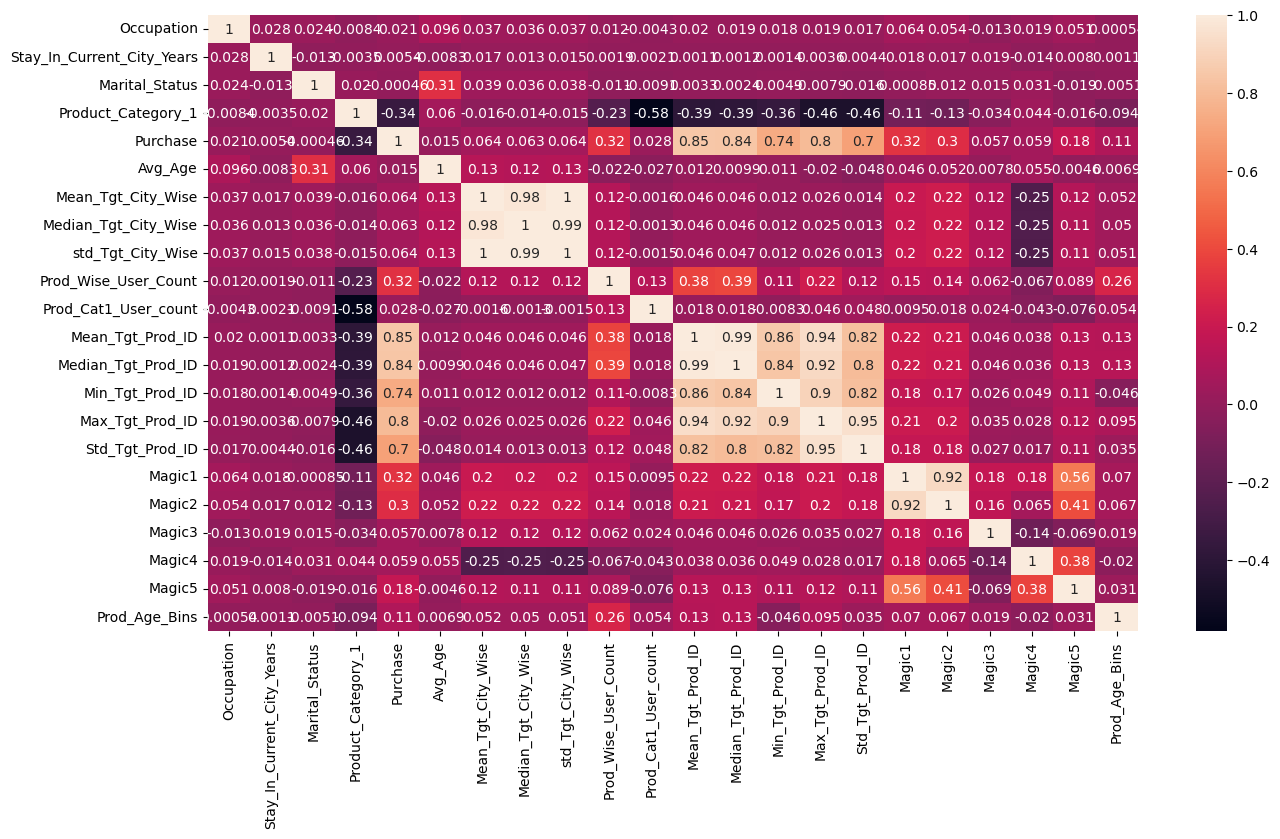

In [56]:
sns.heatmap(new.corr(),annot=True)

In [57]:
# split the data in train and test

newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

newtrain.shape,newtest.shape,train.shape,test.shape

((550068, 27), (233599, 27), (550068, 12), (233599, 11))

In [58]:
# drop purchase from newtest
newtest.drop("Purchase",axis=1,inplace=True)

In [59]:
# drop age from test and train
newtrain.drop("Age",axis=1,inplace=True)
newtest.drop("Age",axis=1,inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler

In [61]:
X=newtrain.drop("Purchase",axis=1)
y=newtrain.Purchase

In [65]:
X.select_dtypes(include=np.number).columns

num_cols=[ 'Avg_Age', 'Mean_Tgt_City_Wise',
       'Median_Tgt_City_Wise', 'std_Tgt_City_Wise', 'Prod_Wise_User_Count',
       'Prod_Cat1_User_count', 'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID',
       'Min_Tgt_Prod_ID', 'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5']

len(num_cols)

16

In [68]:
sc=StandardScaler()

for i in num_cols:
    X.loc[:,i]=sc.fit_transform(pd.DataFrame(X.loc[:,i]))
    newtest.loc[:,i]=sc.transform(pd.DataFrame(newtest.loc[:,i]))

In [70]:
# one hot encoding
dummytrain=pd.get_dummies(X,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)
dummytrain.shape,dummytest.shape

((550068, 26), (233599, 26))

# modelling

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor


In [76]:
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
lr=LinearRegression()
pred=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))
    
finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({"Purchase":finalpred,
                 "User_ID":test.User_ID,
                 "Product_ID":test.Product_ID})

sub.to_csv("fridaylr.csv",index=False)

In [78]:
dt=DecisionTreeRegressor()
preddt=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    preddt.append(dt.fit(xtrain,ytrain).predict(dummytest))
    
finalpreddt=pd.DataFrame(preddt).T.mean(axis=1)
sub=pd.DataFrame({"Purchase":finalpreddt,
                 "User_ID":test.User_ID,
                 "Product_ID":test.Product_ID})

sub.to_csv("fridaydt.csv",index=False)

In [79]:
rf=RandomForestRegressor()
predrf=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    predrf.append(rf.fit(xtrain,ytrain).predict(dummytest))
    
finalpredrf=pd.DataFrame(predrf).T.mean(axis=1)
sub=pd.DataFrame({"Purchase":finalpredrf,
                 "User_ID":test.User_ID,
                 "Product_ID":test.Product_ID})

sub.to_csv("fridayrf.csv",index=False)

In [3]:
df=sns.load_dataset("iris")
df.head()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>